In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2

In [15]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


# function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.square(vector1 - vector2)))

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [36]:

# functions for file handling

def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [16]:
dataset_path = "../dataset/Skin cancer ISIC The International Skin Imaging Collaboration"

In [17]:
actinic_keratosis_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/actinic keratosis"))
basal_cell_carcinoma_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/basal cell carcinoma"))
dermatofibroma_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/dermatofibroma"))
melanoma_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/melanoma"))
nevus_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/nevus"))
pigmented_benign_keratosis_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/pigmented benign keratosis"))
seborrheic_keratosis_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/seborrheic keratosis"))
squamous_cell_carcinoma_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/squamous cell carcinoma"))
vascular_lesion_train_length = len(os.listdir(dataset_path + "/grayscaled/Train/vascular lesion"))

actinic_keratosis_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/actinic keratosis"))
basal_cell_carcinoma_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/basal cell carcinoma"))
dermatofibroma_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/dermatofibroma"))
melanoma_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/melanoma"))
nevus_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/nevus"))
pigmented_benign_keratosis_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/pigmented benign keratosis"))
seborrheic_keratosis_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/seborrheic keratosis"))
squamous_cell_carcinoma_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/squamous cell carcinoma"))
vascular_lesion_test_length = len(os.listdir(dataset_path + "/grayscaled/Test/vascular lesion"))

print("\n\nTrain data length:\n")
print("\tactinic keratosis: ", actinic_keratosis_train_length)
print("\tbasal cell carcinoma: ", basal_cell_carcinoma_train_length)
print("\tdermatofibroma: ", dermatofibroma_train_length)
print("\tmelanoma: ", melanoma_train_length)
print("\tnevus: ", nevus_train_length)
print("\tpigmented benign keratosis: ", pigmented_benign_keratosis_train_length)
print("\tseborrheic keratosis: ", seborrheic_keratosis_train_length)
print("\tsquamous cell carcinoma: ", squamous_cell_carcinoma_train_length)
print("\tvascular lesion: ", vascular_lesion_train_length)

print("\n\nTest data length:\n")
print("\tactinic keratosis: ", actinic_keratosis_test_length)
print("\tbasal cell carcinoma: ", basal_cell_carcinoma_test_length)
print("\tdermatofibroma: ", dermatofibroma_test_length)
print("\tmelanoma: ", melanoma_test_length)
print("\tnevus: ", nevus_test_length)
print("\tpigmented benign keratosis: ", pigmented_benign_keratosis_test_length)
print("\tseborrheic keratosis: ", seborrheic_keratosis_test_length)
print("\tsquamous cell carcinoma: ", squamous_cell_carcinoma_test_length)
print("\tvascular lesion: ", vascular_lesion_test_length)





Train data length:

	actinic keratosis:  114
	basal cell carcinoma:  376
	dermatofibroma:  95
	melanoma:  438
	nevus:  357
	pigmented benign keratosis:  462
	seborrheic keratosis:  77
	squamous cell carcinoma:  181
	vascular lesion:  139


Test data length:

	actinic keratosis:  16
	basal cell carcinoma:  16
	dermatofibroma:  16
	melanoma:  16
	nevus:  16
	pigmented benign keratosis:  16
	seborrheic keratosis:  3
	squamous cell carcinoma:  16
	vascular lesion:  3


In [18]:
actinic_keratosis_train_images = []
basal_cell_carcinoma_train_images = []
dermatofibroma_train_images = []
melanoma_train_images = []
nevus_train_images = []
pigmented_benign_keratosis_train_images = []
seborrheic_keratosis_train_images = []
squamous_cell_carcinoma_train_images = []
vascular_lesion_train_images = []

actinic_keratosis_test_images = []
basal_cell_carcinoma_test_images = []
dermatofibroma_test_images = []
melanoma_test_images = []
nevus_test_images = []
pigmented_benign_keratosis_test_images = []
seborrheic_keratosis_test_images = []
squamous_cell_carcinoma_test_images = []
vascular_lesion_test_images = []

actinic_keratosis_train = os.listdir(dataset_path + "/grayscaled/Train/actinic keratosis");
basal_cell_carcinoma_train = os.listdir(dataset_path + "/grayscaled/Train/basal cell carcinoma");
dermatofibroma_train = os.listdir(dataset_path + "/grayscaled/Train/dermatofibroma");
melanoma_train = os.listdir(dataset_path + "/grayscaled/Train/melanoma");
nevus_train = os.listdir(dataset_path + "/grayscaled/Train/nevus");
pigmented_benign_keratosis_train = os.listdir(dataset_path + "/grayscaled/Train/pigmented benign keratosis");
seborrheic_keratosis_train = os.listdir(dataset_path + "/grayscaled/Train/seborrheic keratosis");
squamous_cell_carcinoma_train = os.listdir(dataset_path + "/grayscaled/Train/squamous cell carcinoma");
vascular_lesion_train = os.listdir(dataset_path + "/grayscaled/Train/vascular lesion");

actinic_keratosis_test = os.listdir(dataset_path + "/grayscaled/Test/actinic keratosis");
basal_cell_carcinoma_test = os.listdir(dataset_path + "/grayscaled/Test/basal cell carcinoma");
dermatofibroma_test = os.listdir(dataset_path + "/grayscaled/Test/dermatofibroma");
melanoma_test = os.listdir(dataset_path + "/grayscaled/Test/melanoma");
nevus_test = os.listdir(dataset_path + "/grayscaled/Test/nevus");
pigmented_benign_keratosis_test = os.listdir(dataset_path + "/grayscaled/Test/pigmented benign keratosis");
seborrheic_keratosis_test = os.listdir(dataset_path + "/grayscaled/Test/seborrheic keratosis");
squamous_cell_carcinoma_test = os.listdir(dataset_path + "/grayscaled/Test/squamous cell carcinoma");
vascular_lesion_test = os.listdir(dataset_path + "/grayscaled/Test/vascular lesion");


In [19]:
for i in range(0, actinic_keratosis_train_length):
    actinic_keratosis_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/actinic keratosis/" + actinic_keratosis_train[i]))

for i in range(0, basal_cell_carcinoma_train_length):
    basal_cell_carcinoma_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/basal cell carcinoma/" + basal_cell_carcinoma_train[i]))

for i in range(0, dermatofibroma_train_length):
    dermatofibroma_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/dermatofibroma/" + dermatofibroma_train[i]))

for i in range(0, melanoma_train_length):
    melanoma_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/melanoma/" + melanoma_train[i]))

for i in range(0, nevus_train_length):
    nevus_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/nevus/" + nevus_train[i]))

for i in range(0, pigmented_benign_keratosis_train_length):
    pigmented_benign_keratosis_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/pigmented benign keratosis/" + pigmented_benign_keratosis_train[i]))

for i in range(0, seborrheic_keratosis_train_length):
    seborrheic_keratosis_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/seborrheic keratosis/" + seborrheic_keratosis_train[i]))

for i in range(0, squamous_cell_carcinoma_train_length):
    squamous_cell_carcinoma_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/squamous cell carcinoma/" + squamous_cell_carcinoma_train[i]))

for i in range(0, vascular_lesion_train_length):
    vascular_lesion_train_images.append(cv2.imread(dataset_path + "/grayscaled/Train/vascular lesion/" + vascular_lesion_train[i]))

for i in range(0, actinic_keratosis_test_length):
    actinic_keratosis_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/actinic keratosis/" + actinic_keratosis_test[i]))

for i in range(0, basal_cell_carcinoma_test_length):
    basal_cell_carcinoma_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/basal cell carcinoma/" + basal_cell_carcinoma_test[i]))

for i in range(0, dermatofibroma_test_length):
    dermatofibroma_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/dermatofibroma/" + dermatofibroma_test[i]))

for i in range(0, melanoma_test_length):
    melanoma_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/melanoma/" + melanoma_test[i]))

for i in range(0, nevus_test_length):
    nevus_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/nevus/" + nevus_test[i]))

for i in range(0, pigmented_benign_keratosis_test_length):
    pigmented_benign_keratosis_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/pigmented benign keratosis/" + pigmented_benign_keratosis_test[i]))

for i in range(0, seborrheic_keratosis_test_length):
    seborrheic_keratosis_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/seborrheic keratosis/" + seborrheic_keratosis_test[i]))

for i in range(0, squamous_cell_carcinoma_test_length):
    squamous_cell_carcinoma_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/squamous cell carcinoma/" + squamous_cell_carcinoma_test[i]))

for i in range(0, vascular_lesion_test_length):
    vascular_lesion_test_images.append(cv2.imread(dataset_path + "/grayscaled/Test/vascular lesion/" + vascular_lesion_test[i]))

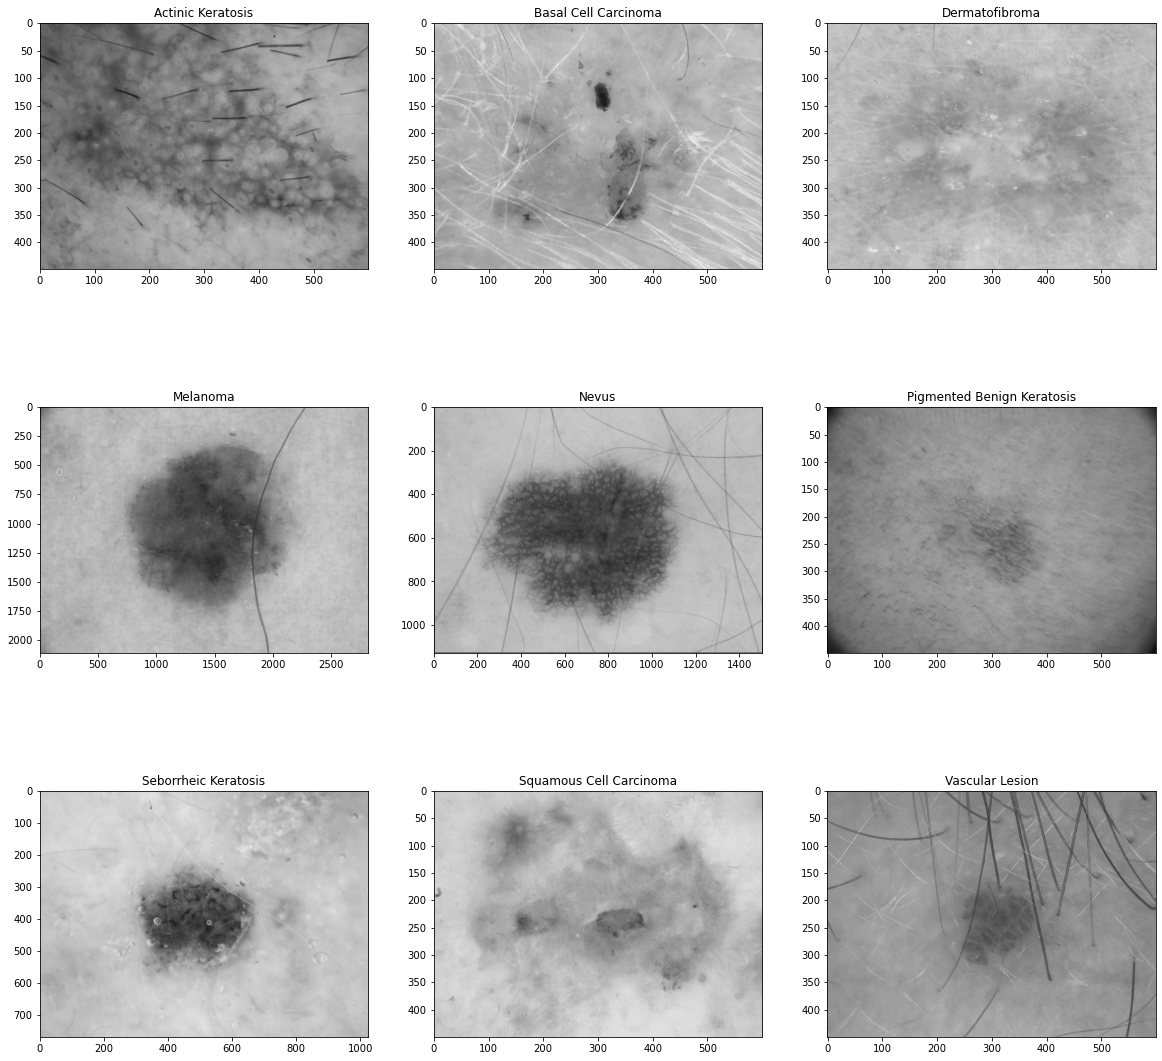

In [20]:
# display 3 images of all classes with titles
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
plt.imshow(actinic_keratosis_train_images[0])
plt.title("Actinic Keratosis")
plt.subplot(3, 3, 2)
plt.imshow(basal_cell_carcinoma_train_images[0])
plt.title("Basal Cell Carcinoma")
plt.subplot(3, 3, 3)
plt.imshow(dermatofibroma_train_images[0])
plt.title("Dermatofibroma")
plt.subplot(3, 3, 4)
plt.imshow(melanoma_train_images[0])
plt.title("Melanoma")
plt.subplot(3, 3, 5)
plt.imshow(nevus_train_images[0])
plt.title("Nevus")
plt.subplot(3, 3, 6)
plt.imshow(pigmented_benign_keratosis_train_images[0])
plt.title("Pigmented Benign Keratosis")
plt.subplot(3, 3, 7)
plt.imshow(seborrheic_keratosis_train_images[0])
plt.title("Seborrheic Keratosis")
plt.subplot(3, 3, 8)
plt.imshow(squamous_cell_carcinoma_train_images[0])
plt.title("Squamous Cell Carcinoma")
plt.subplot(3, 3, 9)
plt.imshow(vascular_lesion_train_images[0])
plt.title("Vascular Lesion")
plt.show()



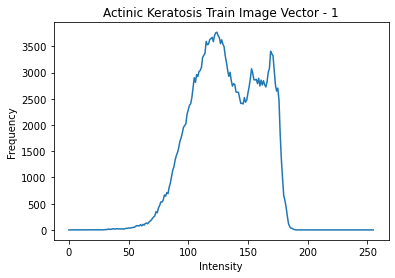

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 6.000e+00 8.000e+00 7.000e+00 1.700e+01 1.100e+01
 1.100e+01 1.500e+01 2.200e+01 1.900e+01 1.500e+01 2.300e+01 2.000e+01
 1.900e+01 2.100e+01 1.600e+01 2.100e+01 1.400e+01 2.500e+01 3.000e+01
 3.000e+01 3.700e+01 3.500e+01 3.800e+01 4.200e+01 5.000e+01 5.200e+01
 7.000e+01 8.300e+01 7.500e+01 7.900e+01 1.000e+02 7.600e+01 1.060e+02
 9.100e+01 1.220e+02 1.300e+02 1.170e+02 1.460e+02 1.670e+02 1.870e+02
 2.220e+02 2.470e+02 2.680e+02 3.480e+02 3.260e+02 4.190e+02 4.640e+02
 5.330e+02 5.300e+02 5.700e+02 6.660e+02 6.430e+02 7.110e+02 6.910e+02
 8.140e+02 8.960e+02 1.012e+03 1.139e+03 1.204e+03 1.333e+03 1.419e+03
 1.477e+03 1.567e+03 1.691e+03 1.753e+03 1.848e+03 1.957e+03 1.988e+03
 2.026

In [25]:
img = actinic_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Actinic Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

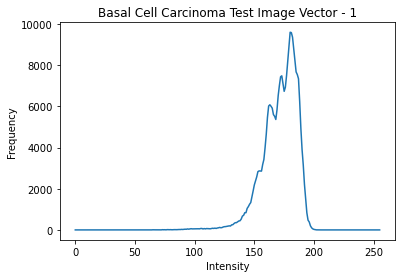

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.000e+00 1.000e+00 1.000e+00
 2.000e+00 1.000e+00 6.000e+00 3.000e+00 4.000e+00 5.000e+00 2.000e+00
 8.000e+00 3.000e+00 2.000e+00 1.100e+01 7.000e+00 1.000e+01 4.000e+00
 1.400e+01 1.000e+01 1.000e+01 1.300e+01 7.000e+00 1.100e+01 1.400e+01
 1.200e+01 1.200e+01 1.700e+01 2.000e+01 1.800e+01 2.600e+01 2.100e+01
 2.900e+01 3.600e+01 3.100e+01 4.800e+01 3.600e+01 4.600e+01 5.900e+01
 5.000

In [26]:
img = basal_cell_carcinoma_test_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Basal Cell Carcinoma Test Image Vector - 1')
plt.show()

print(img_vector)

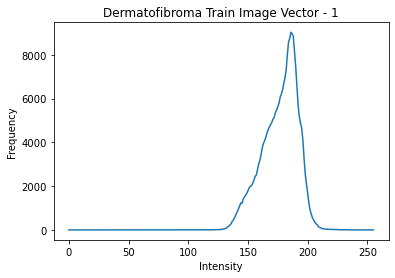

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000

In [27]:
img = dermatofibroma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Dermatofibroma Train Image Vector - 1')
plt.show()

print(img_vector)

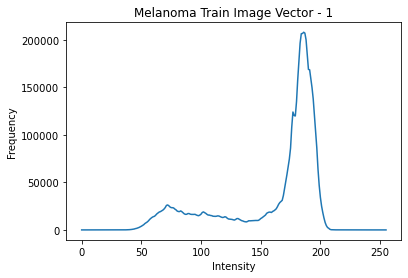

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 4.00000e+00
 7.00000e+00 1.20000e+01 2.70000e+01 3.10000e+01 4.10000e+01 4.20000e+01
 6.90000e+01 8.50000e+01 1.19000e+02 1.84000e+02 2.57000e+02 3.57000e+02
 5.27000e+02 7.16000e+02 9.46000e+02 1.36400e+03 1.62600e+03 2.08900e+03
 2.55700e+03 3.20000e+03 3.87400e+03 4.65900e+03 5.50900e+03 6.72000e+03
 7.55700e+03 8.40700e+03 9.60000e+03 1.10760e+04 1.22150e+04 1.31920e+04
 1.39250e+04 1.43170e+04 1.54980e+04 1.68870e+04 1.78100e+04 1.88380e+04
 1.92570e+04 2.00740e+04 2.08070e+04 2.19510e+04 2.34940e+04 2.57530e+04
 2.62750e+04 2.54400e+04 2.41560e+04 2.34510e+04 2.33860e+04 2.31460e+04
 2.19950e+04 2.11660e+04 1.98590e+04 1.93580e+04 1.

In [28]:
img = melanoma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Melanoma Train Image Vector - 1')
plt.show()

print(img_vector)

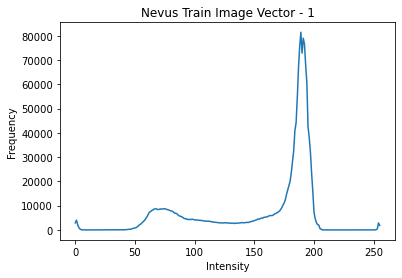

[2.9050e+03 4.0280e+03 2.1520e+03 9.0900e+02 3.6700e+02 8.7000e+01
 1.8000e+01 9.0000e+00 5.0000e+00 2.0000e+00 3.0000e+00 3.0000e+00
 1.0000e+00 2.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 3.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.2000e+01 2.5000e+01 5.7000e+01
 8.2000e+01 1.2000e+02 1.7700e+02 2.5600e+02 2.8000e+02 3.8400e+02
 5.6000e+02 6.9700e+02 8.4800e+02 9.8300e+02 1.2710e+03 1.7370e+03
 2.2030e+03 2.4620e+03 2.9800e+03 3.4680e+03 3.9250e+03 4.6600e+03
 5.3400e+03 6.2730e+03 7.2900e+03 7.5460e+03 8.0180e+03 8.1990e+03
 8.5870e+03 8.6920e+03 8.6770e+03 8.3660e+03 8.4600e+03 8.5190e+03
 8.6590e+03 8.5640e+03 8.7270e+03 8.7120e+03 8.5580e+03 8.3680e+03
 8.2650e+03 8.0860e+03 7.8120e+03 7.7680e+03 7.4890e+03 6.9560e+03
 6.9210e+03 6.6840e+03 6.1950e+03 5.8260e+03 5.6580e+03 5.4550

In [29]:
img = nevus_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Nevus Train Image Vector - 1')
plt.show()

print(img_vector)

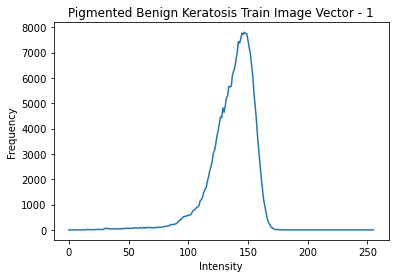

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e+00 1.500e+01 2.100e+01 1.200e+01 8.000e+00 1.200e+01 7.000e+00
 9.000e+00 1.300e+01 1.600e+01 2.200e+01 1.600e+01 1.400e+01 1.500e+01
 2.100e+01 2.300e+01 4.400e+01 7.800e+01 4.500e+01 5.700e+01 4.900e+01
 4.000e+01 3.800e+01 4.700e+01 5.300e+01 4.200e+01 4.100e+01 3.800e+01
 4.400e+01 5.000e+01 5.000e+01 4.100e+01 6.400e+01 5.700e+01 5.700e+01
 7.000e+01 6.100e+01 6.500e+01 6.500e+01 6.600e+01 7.500e+01 7.000e+01
 9.400e+01 7.300e+01 6.900e+01 7.800e+01 9.200e+01 7.600e+01 8.300e+01
 9.900e+01 6.700e+01 8.500e+01 1.080e+02 8.300e+01 1.020e+02 8.300e+01
 9.000e+01 8.300e+01 9.500e+01 9.000e+01 9.700e+01 1.100e+02 9.300e+01
 1.040e+02 1.130e+02 1.310e+02 1.280e+02 1.460e+02 1.450e+02 1.570e+02
 1.610e+02 2.090e+02 2.060e+02 2.210e+02 2.080e+02 2.390e+02 2.470e+02
 2.880e+02 3.400e+02 3.950e+02 4.120e+02 4.680e+02 5.180e+02 5.340e+02
 5.320

In [30]:
img = pigmented_benign_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Pigmented Benign Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

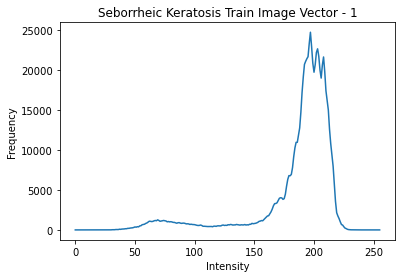

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00
 8.0000e+00 2.4000e+01 2.5000e+01 2.6000e+01 4.9000e+01 4.3000e+01
 4.6000e+01 8.8000e+01 7.2000e+01 1.0400e+02 1.0700e+02 1.2200e+02
 1.4900e+02 1.5200e+02 1.9600e+02 1.9700e+02 2.3100e+02 2.4500e+02
 2.6400e+02 3.0800e+02 3.7200e+02 3.4000e+02 4.0400e+02 3.8000e+02
 5.0100e+02 5.2100e+02 6.4600e+02 6.7900e+02 7.1200e+02 8.1200e+02
 8.6800e+02 9.8000e+02 1.0860e+03 1.0720e+03 1.0420e+03 1.0650e+03
 1.1370e+03 1.1780e+03 1.1470e+03 1.2570e+03 1.1820e+03 1.0800e+03
 1.1060e+03 1.1420e+03 1.1800e+03 1.1450e+03 1.1140e+03 1.0110e+03
 1.0470e+03 1.0040e+03 1.0270e+03 9.9500e+02 9.4000e+02 9.3900e+02
 8.8500e+02 8.3600e+02 8.9300e+02 9.1000e+02 8.4900e+02 8.1700

In [31]:
img = seborrheic_keratosis_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Seborrheic Keratosis Train Image Vector - 1')
plt.show()

print(img_vector)

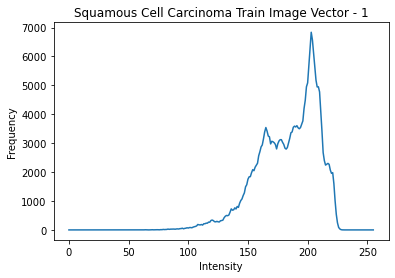

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 2.000e+00 0.000e+00
 2.000e+00 5.000e+00 3.000e+00 3.000e+00 0.000e+00 2.000e+00 6.000e+00
 6.000e+00 3.000e+00 5.000e+00 7.000e+00 7.000e+00 6.000e+00 4.000e+00
 1.000e+01 8.000e+00 1.700e+01 1.200e+01 1.400e+01 1.700e+01 2.900e+01
 2.000e+01 2.600e+01 2.800e+01 3.300e+01 3.000e+01 2.400e+01 3.300e+01
 3.600e+01 3.100e+01 4.400e+01 4.600e+01 5.900e+01 3.900e+01 5.200e+01
 6.000

In [32]:
img = squamous_cell_carcinoma_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Squamous Cell Carcinoma Train Image Vector - 1')
plt.show()

print(img_vector)

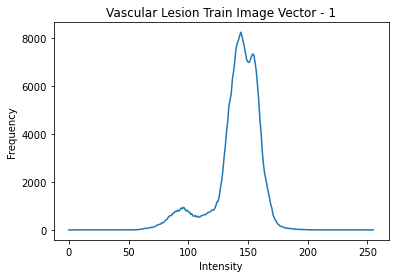

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 3.000e+00 2.000e+00 1.000e+00 1.000e+00 4.000e+00
 6.000e+00 1.000e+01 1.000e+01 2.200e+01 2.600e+01 2.900e+01 4.800e+01
 5.200e+01 7.400e+01 6.400e+01 6.300e+01 8.400e+01 1.030e+02 9.900e+01
 1.110e+02 1.230e+02 1.360e+02 1.680e+02 2.010e+02 2.180e+02 2.360e+02
 2.500e+02 3.070e+02 2.980e+02 3.470e+02 4.120e+02 4.350e+02 5.100e+02
 5.660e+02 6.070e+02 5.960e+02 6.940e+02 7.070e+02 7.760e+02 7.650e+02
 8.280e+02 7.820e+02 8.310e+02 9.190e+02 8.790e+02 9.490e+02 8.910e+02
 7.940

In [33]:
img = vascular_lesion_train_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Vascular Lesion Train Image Vector - 1')
plt.show()

print(img_vector)

In [34]:
actinic_keratosis_train_vectors = []
basal_cell_carcinoma_train_vectors = []
dermatofibroma_train_vectors = []
melanoma_train_vectors = []
nevus_train_vectors = []
pigmented_benign_keratosis_train_vectors = []
seborrheic_keratosis_train_vectors = []
squamous_cell_carcinoma_train_vectors = []
vascular_lesion_train_vectors = []

actinic_keratosis_test_vectors = []
basal_cell_carcinoma_test_vectors = []
dermatofibroma_test_vectors = []
melanoma_test_vectors = []
nevus_test_vectors = []
pigmented_benign_keratosis_test_vectors = []
seborrheic_keratosis_test_vectors = []
squamous_cell_carcinoma_test_vectors = []
vascular_lesion_test_vectors = []

In [35]:
# convert all train and test images to vectors and save to the respective vectors array

for i in range(0,len(actinic_keratosis_train_images)):
    actinic_keratosis_train_vectors.append(get_img_vector(actinic_keratosis_train_images[i]))

for i in range(0,len(basal_cell_carcinoma_train_images)):
    basal_cell_carcinoma_train_vectors.append(get_img_vector(basal_cell_carcinoma_train_images[i]))

for i in range(0,len(dermatofibroma_train_images)):
    dermatofibroma_train_vectors.append(get_img_vector(dermatofibroma_train_images[i]))

for i in range(0,len(melanoma_train_images)):
    melanoma_train_vectors.append(get_img_vector(melanoma_train_images[i]))

for i in range(0,len(nevus_train_images)):
    nevus_train_vectors.append(get_img_vector(nevus_train_images[i]))

for i in range(0,len(pigmented_benign_keratosis_train_images)):
    pigmented_benign_keratosis_train_vectors.append(get_img_vector(pigmented_benign_keratosis_train_images[i]))

for i in range(0,len(seborrheic_keratosis_train_images)):
    seborrheic_keratosis_train_vectors.append(get_img_vector(seborrheic_keratosis_train_images[i]))

for i in range(0,len(squamous_cell_carcinoma_train_images)):
    squamous_cell_carcinoma_train_vectors.append(get_img_vector(squamous_cell_carcinoma_train_images[i]))

for i in range(0,len(vascular_lesion_train_images)):
    vascular_lesion_train_vectors.append(get_img_vector(vascular_lesion_train_images[i]))

for i in range(0,len(actinic_keratosis_test_images)):
    actinic_keratosis_test_vectors.append(get_img_vector(actinic_keratosis_test_images[i]))

for i in range(0,len(basal_cell_carcinoma_test_images)):
    basal_cell_carcinoma_test_vectors.append(get_img_vector(basal_cell_carcinoma_test_images[i]))

for i in range(0,len(dermatofibroma_test_images)):
    dermatofibroma_test_vectors.append(get_img_vector(dermatofibroma_test_images[i]))

for i in range(0,len(melanoma_test_images)):
    melanoma_test_vectors.append(get_img_vector(melanoma_test_images[i]))

for i in range(0,len(nevus_test_images)):
    nevus_test_vectors.append(get_img_vector(nevus_test_images[i]))

for i in range(0,len(pigmented_benign_keratosis_test_images)):
    pigmented_benign_keratosis_test_vectors.append(get_img_vector(pigmented_benign_keratosis_test_images[i]))

for i in range(0,len(seborrheic_keratosis_test_images)):
    seborrheic_keratosis_test_vectors.append(get_img_vector(seborrheic_keratosis_test_images[i]))

for i in range(0,len(squamous_cell_carcinoma_test_images)):
    squamous_cell_carcinoma_test_vectors.append(get_img_vector(squamous_cell_carcinoma_test_images[i]))

for i in range(0,len(vascular_lesion_test_images)):
    vascular_lesion_test_vectors.append(get_img_vector(vascular_lesion_test_images[i]))


In [38]:
# save vectors as txt files

saveFile("../features/original/Train/actinic_keratosis_train_vectors.txt", actinic_keratosis_train_vectors )
saveFile("../features/original/Train/basal_cell_carcinoma_train_vectors.txt", basal_cell_carcinoma_train_vectors )
saveFile("../features/original/Train/dermatofibroma_train_vectors.txt", dermatofibroma_train_vectors )
saveFile("../features/original/Train/melanoma_train_vectors.txt", melanoma_train_vectors )
saveFile("../features/original/Train/nevus_train_vectors.txt", nevus_train_vectors )
saveFile("../features/original/Train/pigmented_benign_keratosis_train_vectors.txt", pigmented_benign_keratosis_train_vectors )
saveFile("../features/original/Train/seborrheic_keratosis_train_vectors.txt", seborrheic_keratosis_train_vectors )
saveFile("../features/original/Train/squamous_cell_carcinoma_train_vectors.txt", squamous_cell_carcinoma_train_vectors )
saveFile("../features/original/Train/vascular_lesion_train_vectors.txt", vascular_lesion_train_vectors )

saveFile("../features/original/Test/actinic_keratosis_test_vectors.txt", actinic_keratosis_test_vectors )
saveFile("../features/original/Test/basal_cell_carcinoma_test_vectors.txt", basal_cell_carcinoma_test_vectors )
saveFile("../features/original/Test/dermatofibroma_test_vectors.txt", dermatofibroma_test_vectors )
saveFile("../features/original/Test/melanoma_test_vectors.txt", melanoma_test_vectors )
saveFile("../features/original/Test/nevus_test_vectors.txt", nevus_test_vectors )
saveFile("../features/original/Test/pigmented_benign_keratosis_test_vectors.txt", pigmented_benign_keratosis_test_vectors )
saveFile("../features/original/Test/seborrheic_keratosis_test_vectors.txt", seborrheic_keratosis_test_vectors )
saveFile("../features/original/Test/squamous_cell_carcinoma_test_vectors.txt", squamous_cell_carcinoma_test_vectors )
saveFile("../features/original/Test/vascular_lesion_test_vectors.txt", vascular_lesion_test_vectors )